In [23]:
# Importation of libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.model_selection import train_test_split
import json
import time

import random
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [1]:
## Uploading the dataset
from google.colab import files
file_path = files.upload()

Saving CETM47-22_23-AS2-Data.json to CETM47-22_23-AS2-Data.json


In [4]:
#Explore data using loads method from json library to identify patterns and characteristics
data_json = json.loads(open('CETM47-22_23-AS2-Data.json').read())

# Print the first 10 records of the tweets_data
data_json[0:10]

[{'text': 'The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516324419866624,
  'label_name': 'sports_&_gaming'},
 {'text': 'I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516440690176006,
  'label_name': 'sports_&_gaming'},
 {'text': 'Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets in October ',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516543387709440,
  'label_name': 'sports_&_gaming'},
 {'text': 'A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn’t indicative of the game flow.  Today, they are demoralizing a better FCS opponent in EKU. {@Coach Satterfield@} thank you!! {{USERNAME}} , 

In [11]:
# Explore the structure of the first item in the JSON data
print(type(data_json))
print(type(data_json[0]))
print(data_json[0].keys())


<class 'list'>
<class 'dict'>
dict_keys(['text', 'date', 'label', 'id', 'label_name'])


In [15]:
# select the set of six topic tweets

# Initialize empty lists to store tweets by topics
all_Arts_Culture_tweets = []
all_Business_Entrepreneurs_tweets = []
all_Pop_Culture_tweets = []
all_Daily_Life_tweets = []
all_Sports_Gaming_tweets = []
all_Science_Technology_tweets = []

# Iterate through the list and categorize tweets based on the 'label_name'
for item in data_json:
    if item['label_name'] == 'arts_&_culture':
        all_Arts_Culture_tweets.append(item)
    elif item['label_name'] == 'business_&_entrepreneurs':
        all_Business_Entrepreneurs_tweets.append(item)
    elif item['label_name'] == 'pop_culture':
        all_Pop_Culture_tweets.append(item)
    elif item['label_name'] == 'daily_life':
        all_Daily_Life_tweets.append(item)
    elif item['label_name'] == 'sports_&_gaming':
        all_Sports_Gaming_tweets.append(item)
    elif item['label_name'] == 'science_&_technology':
        all_Science_Technology_tweets.append(item)

# Check the extracted tweets for one of the topics
print(all_Sports_Gaming_tweets[:10])



[{'text': 'The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard', 'date': '2019-09-08', 'label': 4, 'id': 1170516324419866624, 'label_name': 'sports_&_gaming'}, {'text': 'I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}', 'date': '2019-09-08', 'label': 4, 'id': 1170516440690176006, 'label_name': 'sports_&_gaming'}, {'text': 'Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets in October ', 'date': '2019-09-08', 'label': 4, 'id': 1170516543387709440, 'label_name': 'sports_&_gaming'}, {'text': 'A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn’t indicative of the game flow.  Today, they are demoralizing a better FCS opponent in EKU. {@Coach Satterfield@} thank you!! {{USERNAME}} , glad you’re gone.', 'date':

In [16]:
# Calculate the total number of tweets across all six topics
all_six_topics_tweets = (
    all_Arts_Culture_tweets +
    all_Business_Entrepreneurs_tweets +
    all_Pop_Culture_tweets +
    all_Daily_Life_tweets +
    all_Sports_Gaming_tweets +
    all_Science_Technology_tweets
)

# Print the total number of tweets across all six topics
print('Number of tweets across all six topics: ', len(all_six_topics_tweets))

# Print the type of all_six_topics_tweets
print('\nThe type of all_six_topics_tweets is: ', type(all_six_topics_tweets))


Number of tweets across all six topics:  6443

The type of all_six_topics_tweets is:  <class 'list'>


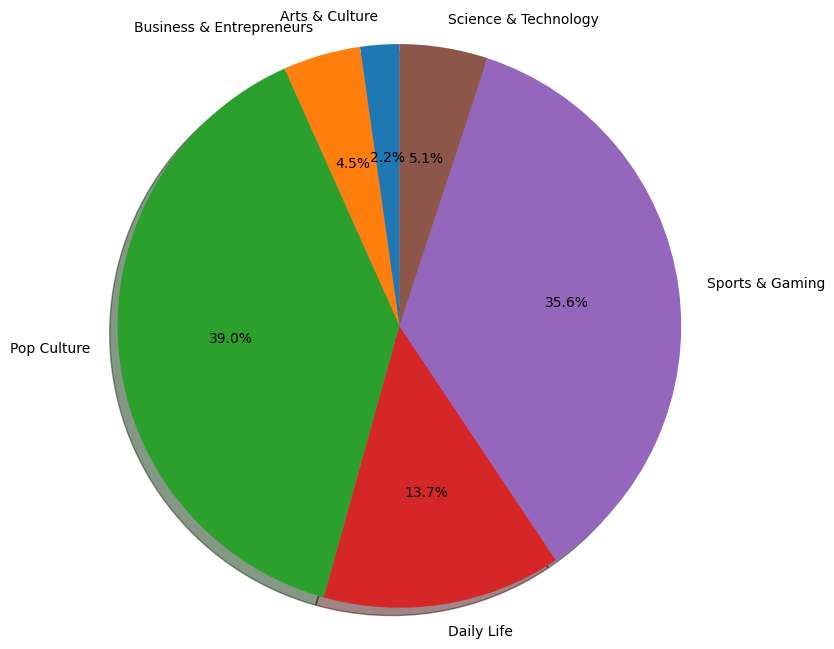

In [18]:
# pie chart that represents the distribution of tweets across the six topics:

# Declare a figure with a custom size
fig = plt.figure(figsize=(8, 8))

# Labels for the six topics
labels = ['Arts & Culture', 'Business & Entrepreneurs', 'Pop Culture', 'Daily Life', 'Sports & Gaming', 'Science & Technology']

# Sizes for each slice (number of tweets in each topic)
sizes = [
    len(all_Arts_Culture_tweets),
    len(all_Business_Entrepreneurs_tweets),
    len(all_Pop_Culture_tweets),
    len(all_Daily_Life_tweets),
    len(all_Sports_Gaming_tweets),
    len(all_Science_Technology_tweets)
]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [21]:
# Combine all six topic tweets into one list
all_six_topics_tweets = (
    all_Arts_Culture_tweets +
    all_Business_Entrepreneurs_tweets +
    all_Pop_Culture_tweets +
    all_Daily_Life_tweets +
    all_Sports_Gaming_tweets +
    all_Science_Technology_tweets
)

# Ensure the index is within the range of the combined list
random_index = random.randint(0, len(all_six_topics_tweets) - 1)

# Print a randomly selected tweet from the six topics in green
print('\033[92m' + all_six_topics_tweets[random_index]['text'] + '\033[0m')


Paige VanZant addresses uncertain future after UFC 251 loss to Amanda Ribas {{URL}} via {@New York Post Sports@}


## Preprocess raw text for Sentiment analysis

In [22]:
# Combine all six topic tweets into one list
all_six_topics_tweets = (
    all_Arts_Culture_tweets +
    all_Business_Entrepreneurs_tweets +
    all_Pop_Culture_tweets +
    all_Daily_Life_tweets +
    all_Sports_Gaming_tweets +
    all_Science_Technology_tweets
)

# Ensure the index is within the range of the combined list
if len(all_six_topics_tweets) > 2277:
    # Our selected sample, complex enough to exemplify each step
    tweet = all_six_topics_tweets[2277]
    print(tweet)
else:
    print("The index 2277 is out of range for the combined tweets list.")


{'text': 'Queen {@Aditi Rao Hydari@} is replying to many I hope the queenwill also reply me #V', 'date': '2020-09-06', 'label': 2, 'id': 1302513707352645634, 'label_name': 'pop_culture'}


In [ ]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

In [24]:
# Assuming tweet2 is a tweet selected from the six topics
tweet2 = all_six_topics_tweets[random.randint(0, len(all_six_topics_tweets) - 1)]['text']

print()
print('\033[92m' + tweet2 + '\033[0m')

# Instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

# Tokenize the tweet
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('\033[94m' + 'Tokenized string:' + '\033[0m')
print(tweet_tokens)


Super bummed that we didn’t get to play at the {@OKCMemorialMarathon@} Kid’s Marathon starting line again this morning, thanks a lot #COVID19  Guess we’ll just have to plan on seeing all the awesome family runners on the rescheduled date in October!  #RunForrestRun #FamilyFunkSuperDuo

Tokenized string:
['super', 'bummed', 'that', 'we', 'didn', '’', 't', 'get', 'to', 'play', 'at', 'the', '{', 'thon', '@', '}', 'kid', '’', 's', 'marathon', 'starting', 'line', 'again', 'this', 'morning', ',', 'thanks', 'a', 'lot', '#covid19', 'guess', 'we', '’', 'll', 'just', 'have', 'to', 'plan', 'on', 'seeing', 'all', 'the', 'awesome', 'family', 'runners', 'on', 'the', 'rescheduled', 'date', 'in', 'october', '!', '#runforrestrun', '#familyfunksuperduo']


In [27]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
# Import the English stop words list from NLTK
stopwords_english = stopwords.words('english')

# Print the stop words
print('Stop words\n')
print(stopwords_english)

# Print the punctuation characters
print('\nPunctuation\n')
print(string.punctuation)


Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['super', 'bummed', 'that', 'we', 'didn', '’', 't', 'get', 'to', 'play', 'at', 'the', '{', 'thon', '@', '}', 'kid', '’', 's', 'marathon', 'starting', 'line', 'again', 'this', 'morning', ',', 'thanks', 'a', 'lot', '#covid19', 'guess', 'we', '’', 'll', 'just', 'have', 'to', 'plan', 'on', 'seeing', 'all', 'the', 'awesome', 'family', 'runners', 'on', 'the', 'rescheduled', 'date', 'in', 'october', '!', '#runforrestrun', '#familyfunksuperduo']

removed stop words and punctuation:
['super', 'bummed', '’', 'get', 'play', 'thon', 'kid', '’', 'marathon', 'starting', 'line', 'morning', 'thanks', 'lot', '#covid19', 'guess', '’', 'plan', 'seeing', 'awesome', 'family', 'runners', 'rescheduled', 'date', 'october', '#runforrestrun', '#familyfunksuperduo']


Please note that the words **happy** and **sunny** in this list are correctly spelled.

In [29]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['super', 'bummed', '’', 'get', 'play', 'thon', 'kid', '’', 'marathon', 'starting', 'line', 'morning', 'thanks', 'lot', '#covid19', 'guess', '’', 'plan', 'seeing', 'awesome', 'family', 'runners', 'rescheduled', 'date', 'october', '#runforrestrun', '#familyfunksuperduo']

stemmed words:
['super', 'bum', '’', 'get', 'play', 'thon', 'kid', '’', 'marathon', 'start', 'line', 'morn', 'thank', 'lot', '#covid19', 'guess', '’', 'plan', 'see', 'awesom', 'famili', 'runner', 'reschedul', 'date', 'octob', '#runforrestrun', '#familyfunksuperduo']


That's it! Now we have a set of words we can feed into to the next stage of our machine learning project.

In [34]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean


def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [35]:
# Assuming the function process_tweet is defined elsewhere
def process_tweet(tweet):
    # Example preprocessing steps (you may have your own implementation)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    stopwords_english = stopwords.words('english')
    tweet_clean = [word for word in tweet_tokens if word not in stopwords_english and word not in string.punctuation]
    return ' '.join(tweet_clean)

# Combine all six topic tweets into one list
all_six_topics_tweets = (
    all_Arts_Culture_tweets +
    all_Business_Entrepreneurs_tweets +
    all_Pop_Culture_tweets +
    all_Daily_Life_tweets +
    all_Sports_Gaming_tweets +
    all_Science_Technology_tweets
)

# Choose the tweet at index 6443
if len(all_six_topics_tweets) > 6443:
    tweet = all_six_topics_tweets[6443]['text']

    print()
    print('\033[92m')
    print(tweet)
    print('\033[94m')

    # Call the imported function (assuming it's defined or imported)
    tweets_stem = process_tweet(tweet)  # Preprocess the given tweet

    print('Preprocessed tweet:')
    print(tweets_stem)  # Print the result
else:
    print("The index 6443 is out of range for the combined tweets list.")

The index 6443 is out of range for the combined tweets list.
